# Controle continu de Modélisation Numérique en Physique
### -BOUGUESSA Skander 21206229

## Sommaire :

## 1 - Introduction 


## 2 - Partie 1
### 2.1 - Question 1
### 2.2 - Question 2
### 2.3 - Question 3 & 4


## 3 - Partie 2
### 3.1 - Question 5 & 6
### 3.2 - Question 7

## 1 - Introduction
Le but de ce contrôle est d'analyser un systéme de plusieurs masses attachées par des ressorts, plus particulièrement on s'interesse au déplacement de chaque masse vis à vis de leur position d'équilibre, pour ce faire, nous considérerons ainsi que ces dernères se comportent comme une suite. Pour un systéme à $N+2$ masses $m$ numérotées de $0$ à $N+1$ et reliées entre elles par des ressorts de raideur $k$; Le déplacement de la masse $n$ par rapport à sa position d'équilibre est: $A_n \cos(\omega t)$ où $\omega$ est la pulsation propre du système et $A_n$ l'amplitude du déplacement de la n-ieme masse, on s'attend d'ailleurs à ce que chaque masse aie une amplitude différente, d'où le raisonnement par des suites. 

Afin de simplifier le calcul et notre programme, on utilise $\sqrt{k/m}$ comme unité pour les pulsations, $F/k$ comme unité pour les amplitudes et on pose $A_n = A u_n$ et $u_1=1$. On pose que la suite d'éléments $u_n$ a pour relation de récurrence :

$$u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ , \ \ \ u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \ $$
où le facteur $A$ est défini comme $$A=\frac{1}{(2-\omega^2)u_N-u_{N-1}} \ \ \ .$$

On remarque que $u_0=0$ car nous avons, par hypothèse, fixé la première et dernère masse, on considère cela comme étants nos conditions limites , et on se proposera d'appuyer la validité de notre modèle en vérifiant si ces dernères sont bel et bien respectées.

## 2 - Partie 1
### 2.1 - Question 1

On se propose de démontrer tout d'abord que le système de masse-ressort présente un phénomène de résonance pour certaines valeurs de la pulsation $\omega_r$ de la force d'excitation $F$. 

On commence par le calcul des $u_n$ afin de vérifier si nos conditions limites sont respectées par notre modèle, pour cela on définit une fonction $G(x)$ qui définira pour la suite de cette partie notre suite $u_n$, cette fonction aura deux argument puisque notre récurence est définie sur les deux termes précédent, et que nousnous sommes munis des termes $u_0$ et $u_1$. Voici le code ci-dessous : 

318.31027888359677


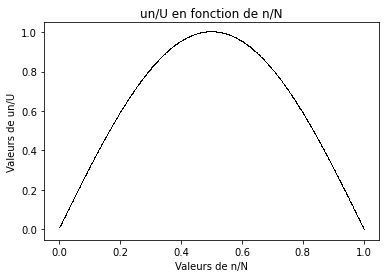

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000 #Nombre de masses
omega = np.pi / N #Pulsation
u0 = 0
u1 = 1
un = []

n = np.linspace(1,N,N)
def G(x,y) :
    '''Définit la suite un'''
    return (2 - omega**2)*x - y

for i in range(N) :
    u2 = G(u1,u0)
    un.append (u2)
    u0 = u1
    u1 = u2

U = np.max(un) #Valeur maximale de U
print(U)

#Graphique
plt.plot(n/N,un/U,"k,", markersize = 0.5)
plt.xlabel("Valeurs de n/N")
plt.ylabel("Valeurs de un/U")
plt.title("un/U en fonction de n/N")
plt.show()


On remarque qu'aux masses $n=0$ et $n=N$ il n'y a aucun déplacement ($u_n = 0$), ceci est cohérent avec nos conditions aux limites et nous conforte dans l'utilisation de ce modèle.
### 2.2 - Question 2
Nous nous intéressons désormais aux valeurs de $A$ ,ou plus précisément, ses valeurs absolues pour différentes valeurs de $\omega$ que l'on va faire varier de $0$ à $20/N$. 

On prendra ici 10000 valeurs de $\omega$ afin d'analyser le comportement de $A$ dont on rappelle l'expression :

$$A=\frac{1}{(2-\omega^2)u_N-u_{N-1}} \ \ \ .$$

Text(0.5, 1.0, 'Valeurs absolues de A en fonction de la pulsation')

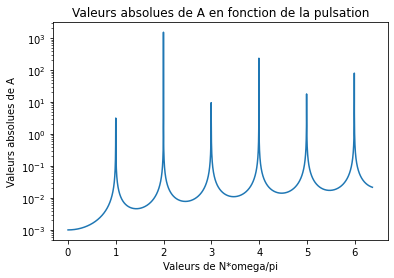

In [2]:
omega =np.linspace(0,20/N, 10000)#Pulsation du système

un = [] #on réinitialise un

def G(x,y) :
    '''Définit la suite un'''
    return (2 - omega**2)*x - y

for i in range(N) :
    u2 = G(u1,u0)
    un.append (u2)
    u0 = u1
    u1 = u2
    
A = 1/((2 - omega**2)*un[N-1] - un[N-2])
absA = np.abs(A)
plt.semilogy(N*omega/np.pi,absA)
plt.xlabel("Valeurs de N*omega/pi")
plt.ylabel("Valeurs absolues de A")
plt.title("Valeurs absolues de A en fonction de la pulsation")

On remarque que la pulsation est bien plus importante pour les valeurs en modulo-$\pi/N$ de $\omega$, ceci s'observe graphiquement avec des pics de résonances aux valeurs entières associées à $N \cdot \omega / \pi$

### 2.3 - Questions 3 & 4
Il nous est demandé de représenter sur un même graphique les valeurs des éléments de la suite $u_n/U$ en fonction de $n/N$ pour les 4 premières valeurs des pulsations de résonance afin de mieux comprendre l'impact de ces dernières, on se propose d'utiliser les valeurs en modulo-$\pi/N$ de $\omega$ qui sont beaucoup plus intéressantes pour notre analyse. 

On se propose également d'analyser l'impact du changement des valeurs de N dans le même code afin de libérer de l'espace et de la mémoire, ainsi on utilisera la fonction unput, veuillez, pour la réponse à la troisième question, utiliser $N = 1000$ .

Voici le code ci-dessous permettant de tracer ces suites  : 

In [ ]:
u0 = 0
u1 = 1
N = int(input()) #Valeur de N à donner
n = np.linspace(1,N,N) #pas 
for k in range (1,5):
    
    omega = k*np.pi/N
    def G(x,y) :
        '''Définit la suite un'''
        return (2 - omega**2)*x - y

    un[k] = []
    u0 = 0
    u1 = 1
    
    for i in range(N) :
        
        u2 = G(u1,u0)
        un[k].append(u2)
        u0 = u1
        u1 = u2
        U = np.max(un[k]) #Valeur maximale de U
    print(U)
    
    #Graphiques
    plt.plot(n/N,un[k]/U , label=f'Un {k}')
    plt.xlabel("Valeurs de n/N")
    plt.ylabel("Valeurs de un/U")
    plt.title("un/U en fonction de n/N")
    

plt.legend()    
plt.show()  


On remarque tout d'abord graphiquement que la suite $u_n$ suis une courbe sinusoïdale, en effet , ce que l'on a pu observé à la question une, n'était autre qu'une courbe sinusoïdale à trés longue période, ceci peut s'intuiter en observant le comportement des suites pour d'autres valeurs de $\omega$.

On remarque aussi que changer la valeur de N n'a qu'une influence trés minime, voir négligeable sur notre système, on remarque que par moment, les conditions aux limites ne sont plus respectées, mais ceci peut être lié au fait que notre modèle n'est pas fait pour de petites valeurs de N, où qu'il n'est pas correct à 100%. Toutefois on peut noter que la valeur de $\omega$ influe largement plus que celle de N, tellement que tout changement sur cette dernière peut être ignoré.

## 3 - Partie 2
### 3 - 1 Question 5 & 6
Dans cette partie, on se propose de modifier les masses de la première moitié de notre système, en d'autres termes les masses de $0$ à $N/2$ valent maintenant $m'=rm$. La suite d'éléments $u_n$ est donnée par $$u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ , \ \ \ u_n=(2-r\omega^2)u_{n-1}-u_{n-2} \ \ \ \mathrm{pour} \ \ \ n\le N/2 \ \ \ ,$$ $$u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \ \mathrm{pour} \ \ \ n > N/2 \ \ \ .$$
Le facteur $A$ est toujours donné par la même expression. On utilisera $N=1000$ pour toute cette partie.

On essaie tout d'abord d'analyser le comportement de l'amplitude en fonction des valeurs de r, on prend pour cela des valaurs entières de r allant de 1 à 5 et on se munit du code ci-dessous :

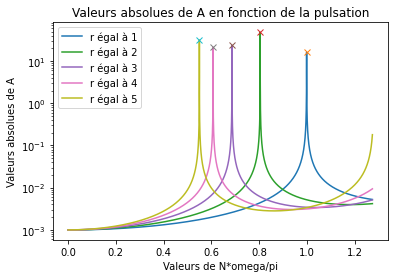

In [3]:
from scipy.signal import find_peaks
omega =np.linspace(0,4/N, 10000)#Pulsation du système
N = 1000

un = [] #on réinitialise un


for k in range (1,6) :
    r = k #valeurs de r
    un = []
    u0 = 0
    u1 = 1
    def G(x,y) :
        '''Définit la suite un'''
        return (2 - omega**2)*x - y
    def G_(x,y) :
        '''définit les N/2 premiers termes'''
        return (2 - r*omega**2)*x - y
    for i in range(N) :
        if i <= N/2 : #N/2 premiers termes
            u2 = G_(u1,u0)
            un.append (u2)
            u0 = u1
            u1 = u2
        else :
            u2 = G(u1,u0)
            un.append (u2)
            u0 = u1
            u1 = u2
    A = 1/((2 - omega**2)*un[N-1] - un[N-2])
    absA = np.abs(A)
    peaks, _ = find_peaks(absA) #définition des pics
    x = N*omega/np.pi
    
    #Graphiques
    plt.semilogy(x,absA,label=f'r égal à {r}' )
    plt.plot(x[peaks], absA[peaks], "x")
    plt.xlabel("Valeurs de N*omega/pi")
    plt.ylabel("Valeurs absolues de A")
    plt.title("Valeurs absolues de A en fonction de la pulsation")
    
plt.legend()
plt.show()


On remarque que plus la valeurs de r grandit, on remarque que la première impulsion est décalée vers la gauche, ceci se confime avec la fonction find_peaks de python.
### 3.2 -  Question 7
On s'interesse désormais à l'impact sur la suite $u_n$ :

530.5166079519786
385.29941448265714
306.2942133855206
265.2584999770755
237.25448911387875


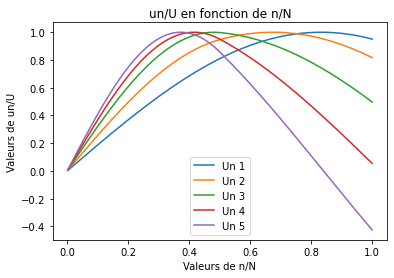

In [4]:
u0 = 0
u1 = 1
N = 1000
n = np.linspace(1,N,N)

for k in range (1,6):
    
    r = k
    u0 = 0
    u1 = 1
    omega = 0.6*np.pi/N
    def G(x,y) :
        '''Définit la suite un'''
        return (2 - omega**2)*x - y
    def G_(x,y) :
        '''définit les N/2 premiers termes'''
        return (2 - r*omega**2)*x - y

    un[k] = []
    
    for i in range(0,500) : #N/2 premiers termes
        
        u2 = G_(u1,u0)
        un[k].append(u2)
        u0 = u1
        u1 = u2
    for i in range(500,1000) : 
        u2 = G(u1,u0)
        un[k].append(u2)
        u0 = u1
        u1 = u2
        U = np.max(un[k])
    print(U)
    
    #Graphiques
    plt.plot(n/N,un[k]/U , label=f'Un {k}')
    plt.xlabel("Valeurs de n/N")
    plt.ylabel("Valeurs de un/U")
    plt.title("un/U en fonction de n/N")
    

plt.legend()    
plt.show()  


On remarque qu'il y a un décalage pour chaque suite , ceci est cohérent avec notre décalage d'amplitude observé précédemment.